In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
#creating a dataset
import numpy as np
import matplotlib.pyplot as plt

#Create features
X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

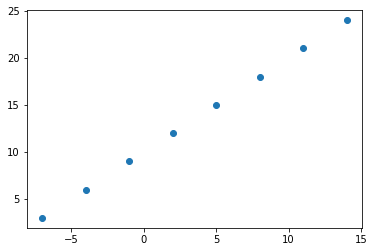

In [ ]:
#Visulize
plt.scatter(X,y)

In [ ]:
y==X+10 # this the realation between independent variable and dependent variable

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
#check dependent and independent variable
inputshape=X.shape
outputshape=y.shape
inputshape,outputshape

((8,), (8,))

In [ ]:
#converting input and output to numbers
X=tf.constant(X)
y=tf.constant(y)
inputshape=X[0].shape
outputshape=y[0].shape
inputshape,outputshape

(TensorShape([]), TensorShape([]))

Blank shape means rank zero tensor which is a scalar

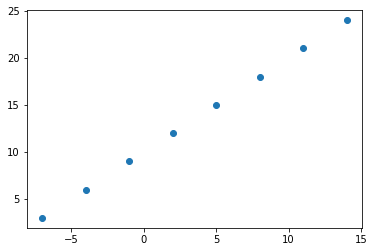

In [ ]:
plt.scatter(X,y)

## Steps in modelling with Tensorflow<br>
1.Creating a model :define input and output layers,as well as the hidden layers of a deep learning model <br>
2.Compiling a Model : define the loss function(a function which tell as how wrong our model is) and evalution metric(which helps to interpret the performance)<br>
3.Fitting the model- letting the model to learn the pattern between the input and output

4.Evaluate the model<br>
5.Improving the model by experimentation.<br>
6.Save the model.


In [ ]:
from tensorflow.python import metrics
#set random seed
tf.random.set_seed(42)
#1.Create a model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    ])
#2.Compile the model
model.compile(loss=tf.keras.losses.mae,optimizer="sgd",metrics=["mae"])

#mae =mean(abs(y_true-y_pred),axis=1) tells us on average how wrong our preditions are
#optimatiser=Optimizers are Classes or methods used to change the attributes of your machine/deep learning 
              #model such as weights and learning rate in order to reduce the losses. Optimizers help to get results faster
#SGD - stochatisc  gradient descent 
#metric = metric is a function that is used to judge the performance of your model.
          # Metric functions are similar to loss functions, except that the results from evaluating a metric are not used when training the model
    

#3.fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 18ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
tf.expand_dims(X,axis=-1)

<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]])>

In [ ]:
#check  X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 372ms/step


array([[12.716021]], dtype=float32)

from our loss function/metric its clear that on average the predicted value is off by 11 points

##improving the model
 
 We can improve the model by making changes in each of the steps we followed to create the model<br>

1.**Creating the model**: we might need to add more hidden layers,
   change the activation function of each of the layer<br>
2.**Compiling the model** : change the optimatizer , or parameters in optimizer such as learning rate.<br>
3.**Fitting the model** : fit the model for more epochs.



In [ ]:
##improving the model
#1. create the model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)])
#2.complie the model
model.compile(loss=tf.keras.losses.mae,optimizer="sgd",metrics=["mae"])
#fit the mode
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 32ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] -

In [ ]:
model.predict([17])

1/1 [==============================] - 0s 400ms/step


array([[29.739855]], dtype=float32)

In [ ]:
#adding more layers
model= tf.keras.Sequential(
    [tf.keras.layers.Dense(100,activation="relu"),
     tf.keras.layers.Dense(1)]
)
model.compile(loss=tf.keras.losses.mae,optimizer="sgd",metrics=["mae"])
model.fit(tf.expand_dims(X,axis=1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 6ms/ste

In [ ]:
model.predict([17])

1/1 [==============================] - 0s 197ms/step


array([[31.223137]], dtype=float32)

In [ ]:
#adding more layers
model= tf.keras.Sequential(
    [tf.keras.layers.Dense(500,activation="relu"),
     tf.keras.layers.Dense(1)]
)
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(lr=0.01),metrics=["mae"])
model.fit(tf.expand_dims(X,axis=1),y,epochs=100)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 1s/step - loss: 13.7711 - mae: 13.7711
Epoch 2/100
1/1 [==============================] - 0s 31ms/step - loss: 11.9145 - mae: 11.9145
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 10.2215 - mae: 10.2215
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 8.7953 - mae: 8.7953
Epoch 5/100
1/1 [==============================] - 0s 30ms/step - loss: 7.3026 - mae: 7.3026
Epoch 6/100
1/1 [==============================] - 0s 30ms/step - loss: 5.6977 - mae: 5.6977
Epoch 7/100
1/1 [==============================] - 0s 25ms/step - loss: 4.0253 - mae: 4.0253
Epoch 8/100
1/1 [==============================] - 0s 49ms/step - loss: 3.9595 - mae: 3.9595
Epoch 9/100
1/1 [==============================] - 0s 42ms/step - loss: 4.6381 - mae: 4.6381
Epoch 10/100
1/1 [==============================] - 0s 49ms/step - loss: 5.1431 - mae: 5.1431
Epoch 11/100
1/1 [==============================] - 0s 47ms/step - loss: 5.31

In [ ]:
model.predict([17])

1/1 [==============================] - 0s 269ms/step


array([[28.800983]], dtype=float32)

In [ ]:
#Evaluation
#visualise the data
X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

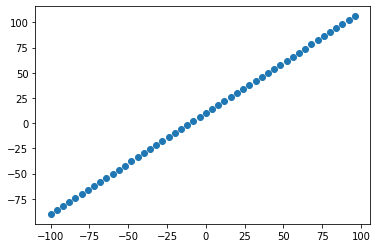

In [ ]:
plt.scatter(X,y)

In [ ]:
#splitting the data into training and testing set
len(X)

50

In [ ]:
X_train=X[:40]
X_test=X[40:]
y_train=y[:40]
y_test=y[40:]
len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

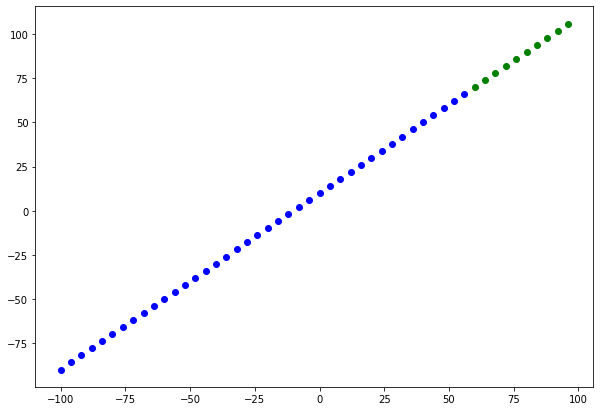

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c="b",label="Training Data")
plt.scatter(X_test,y_test,c="g",label="Testing Data")

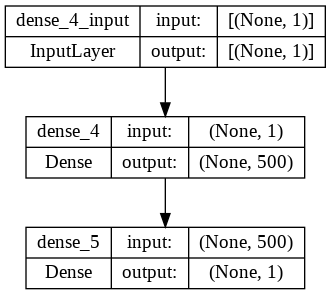

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
    tf.keras .layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(lr=0.01),metrics=["mae"])

In [ ]:
model.fit(X_train,y_train,epochs=100,verbose=0)

In [ ]:
y_pred=model.predict(X_test)
y_pred

1/1 [==============================] - 0s 73ms/step


array([[ 70.41623 ],
       [ 74.4409  ],
       [ 78.46557 ],
       [ 82.49023 ],
       [ 86.51491 ],
       [ 90.539566],
       [ 94.56424 ],
       [ 98.58891 ],
       [102.61358 ],
       [106.638245]], dtype=float32)

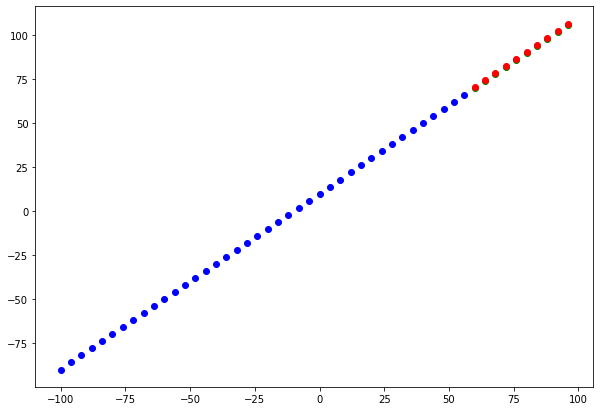

In [ ]:
def plot_predictions(X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,y_pred=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(X_train,y_train,c="b",label="Training Data")
  plt.scatter(X_test,y_test,c="g",label="Testing Data")
  plt.scatter(X_test,y_pred,c="r",label="predictions")
plot_predictions()
           

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
y_pred

array([[ 70.41623 ],
       [ 74.4409  ],
       [ 78.46557 ],
       [ 82.49023 ],
       [ 86.51491 ],
       [ 90.539566],
       [ 94.56424 ],
       [ 98.58891 ],
       [102.61358 ],
       [106.638245]], dtype=float32)

In [ ]:
sum(abs((tf.cast(y_test,dtype=tf.float32)-tf.squeeze(y_pred))))/10

<tf.Tensor: shape=(), dtype=float32, numpy=0.5272377>

In [ ]:
tf.keras.losses.mae(y_test,tf.squeeze( y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.5272377>

In [ ]:
tf.keras.losses.mean_squared_error(y_true=y_test,y_pred=tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.28299996>